## Exec time comparison with C-version 

### mensur creation for time-consuming calculation

Create sliced taper mensur.

In [2]:
def yy(x):
    return (20*x/1000 + 10)

In [3]:
yy(0)

10.0

In [4]:
yy(1000)

30.0

Write data for legacy C version of calcimp.

In [5]:
f = open('taper.men','w')
f.write('% 10 - 30 taper\n')
for i in range(1000):
    f.write('{0},{1},1,\n'.format(yy(i),yy(i+1)))
f.write('30,0,0,\n')
f.close()

### Comparison 

In [4]:
# call c-version calcimp. It creates taper.imp 
!time ../../kanutils/src/calcimp taper.men 


real	0m5.066s
user	0m4.483s
sys	0m0.025s


メンズールが1000分割されているため、C言語版でもそこそこの時間がかかる。 

In [5]:
# use c-extension calcimp
import calcimp

In [6]:
%%time 
f,re,im,mag = calcimp.calcimp("taper.men")

CPU times: user 1.48 s, sys: 9.57 ms, total: 1.49 s
Wall time: 2.27 s


何故かpython版の方が速い。

In [7]:
import pandas as pd

In [8]:
res = pd.read_csv("taper.imp")

In [9]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')


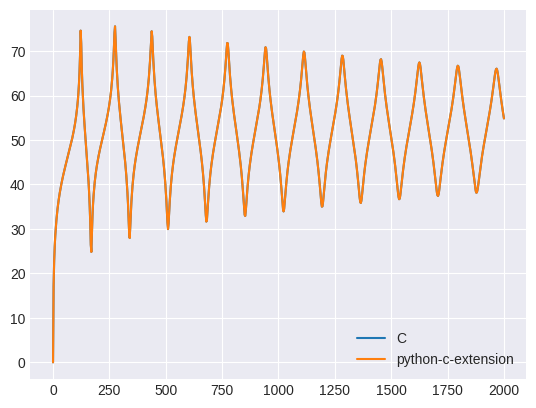

In [20]:
plt.plot(res["freq"], res["mag"], label = "C")
plt.plot(f,mag, label="python-c-extension")
plt.legend()

Calculation result is same. 

Another trial.

In [14]:
# simple mensur by C-language
!time ../../kanutils/src/calcimp ../sample/test.men 


real	0m0.035s
user	0m0.010s
sys	0m0.004s


In [17]:
%%time 
_,_,_,mag_st = calcimp.calcimp("../sample/test.men")

CPU times: user 2.15 ms, sys: 1 ms, total: 3.15 ms
Wall time: 2.99 ms


Somehow python-c-extension is faster for this taper.men, though it is slower for more simple straight mensur. 

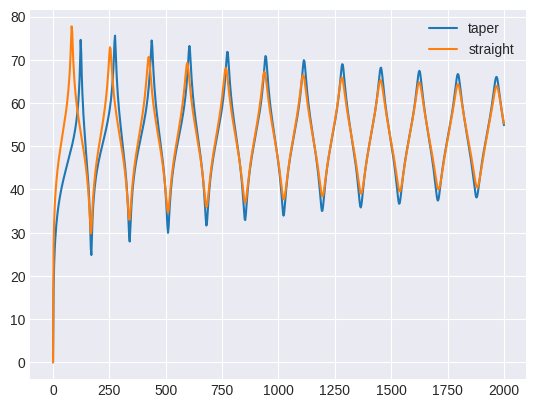

In [19]:
plt.plot(f,mag, label="taper")
plt.plot(f,mag_st, label="straight")
plt.legend()

テーパー管は直管に比べて共振ピークの音程が上がることはよく知られている。